In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine, load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix
from decision_tree.dec_tree import MyDecisionTree
from decision_tree import dec_tree_interp as tree_repr

## Тестирование (Проверочка)

In [6]:
RANDOM_STATE = 42
X = np.ones((4, 5), dtype=float) * np.arange(4)[:, None]
y = np.arange(4)[:, None] + np.asarray([0.2, -0.3, 0.1, 0.4])[:, None]
class_estimator = MyDecisionTree(max_depth=10, criterion_name='gini')

(X_l, y_l), (X_r, y_r) = class_estimator.make_split(1, 1., X, y)

assert np.array_equal(X[:1], X_l)
assert np.array_equal(X[1:], X_r)
assert np.array_equal(y[:1], y_l)
assert np.array_equal(y[1:], y_r)

In [52]:
X_t = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [1, 0], [0, 1], [0, 0], [0, 0]])
y_t = np.array([[0], [1], [1], [0], [1], [1], [0], [0]])
clf = MyDecisionTree(max_depth=2)
clf.fit(X_t, y_t)
preds = clf.predict(X_t)
print(accuracy_score(y_t, preds))
print(tree_repr.export_text(clf, feature_names=['x', 'y']))


1.0
|--- x < 1.00
|   |--- y < 1.00
|   |   |--- class: 0
|   |--- y >= 1.00
|   |   |--- class: 1
|--- x >= 1.00
|   |--- y < 1.00
|   |   |--- class: 1
|   |--- y >= 1.00
|   |   |--- class: 0



b:\University\DSS\decision_tree\dec_tree.py:44: RuntimeWarning: invalid value encountered in true_divide
  p = np.sum(y, axis=0) / n # probability of each class


<AxesSubplot:>

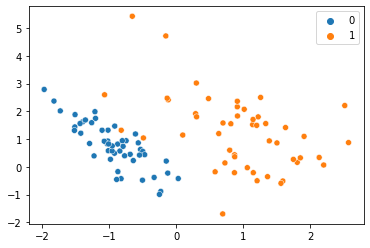

In [53]:
# Проверка корректности на классификации двух кластеров точек
from sklearn.datasets import make_classification
X_t, y_t = make_classification(
    n_features=2, 
    n_redundant=0, 
    n_informative=2, 
    random_state=2, 
    n_clusters_per_class=1)
sns.scatterplot(x=X_t[:, 0], y=X_t[:, 1], hue=y_t)

b:\University\DSS\decision_tree\dec_tree.py:44: RuntimeWarning: invalid value encountered in true_divide
  p = np.sum(y, axis=0) / n # probability of each class


0.98
|--- x < 0.10
|   |--- y < 2.41
|   |   |--- y < 1.04
|   |   |   |--- class: 0
|   |   |--- y >= 1.04
|   |   |   |--- class: 0
|   |--- y >= 2.41
|   |   |--- x < -1.07
|   |   |   |--- class: 0
|   |   |--- x >= -1.07
|   |   |   |--- class: 1
|--- x >= 0.10
|   |--- class: 1



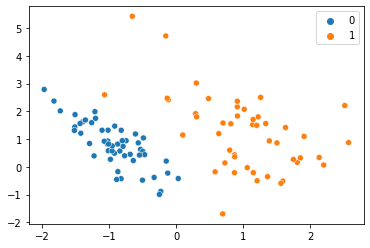

In [54]:
model = MyDecisionTree(max_depth=3)
model.fit(X_t, y_t[:, None])
preds = model.predict(X_t)
sns.scatterplot(x=X_t[:, 0], y=X_t[:, 1], hue=preds[:, 0])
print(accuracy_score(y_t, preds))
print(tree_repr.export_text(model, feature_names=['x', 'y']))

In [55]:
digits_data = load_digits().data
digits_target = load_digits().target[:, None] # to make the targets consistent with our model interfaces
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_target, test_size=0.2, random_state=RANDOM_STATE)

In [56]:
class_estimator = MyDecisionTree(max_depth=8, criterion_name='entropy')
class_estimator.fit(X_train, y_train)
ans = class_estimator.predict(X_test)
accuracy_entropy = accuracy_score(y_test, ans)
print(accuracy_entropy)

b:\University\DSS\decision_tree\dec_tree.py:25: RuntimeWarning: invalid value encountered in true_divide
  p = np.sum(y, axis=0) / n


0.8805555555555555


In [57]:
print(tree_repr.export_text(class_estimator))

|--- 42 < 8.00
|   |--- 43 < 4.00
|   |   |--- 26 < 7.00
|   |   |   |--- 30 < 2.00
|   |   |   |   |--- 63 < 5.00
|   |   |   |   |   |--- 29 < 14.00
|   |   |   |   |   |   |--- 53 < 9.00
|   |   |   |   |   |   |   |--- 29 < 11.00
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- 29 >= 11.00
|   |   |   |   |   |   |   |   |--- class: 9
|   |   |   |   |   |   |--- 53 >= 9.00
|   |   |   |   |   |   |   |--- 1 < 1.00
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- 1 >= 1.00
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- 29 >= 14.00
|   |   |   |   |   |   |--- 4 < 12.00
|   |   |   |   |   |   |   |--- 2 < 7.00
|   |   |   |   |   |   |   |   |--- class: 9
|   |   |   |   |   |   |   |--- 2 >= 7.00
|   |   |   |   |   |   |   |   |--- class: 9
|   |   |   |   |   |   |--- 4 >= 12.00
|   |   |   |   |   |   |   |--- 1 < 1.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--

## Загрузка и анализ данных

In [58]:
data = load_wine()
X, y = data.data, data.target[:, None]
print(X.shape)
print(y.shape)


(178, 13)
(178, 1)


In [59]:
df = pd.DataFrame(
    data = np.concatenate((data.data, data.target[:, None]), axis=1), 
    columns = [*data.feature_names, 'target'])
df['target'] = df['target'].astype(int)
df.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
57,13.29,1.97,2.68,16.8,102.0,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270.0,0
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,1
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0,2
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0,2
94,11.62,1.99,2.28,18.0,98.0,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345.0,1


Проверим данные на корректность:

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [61]:
df.target.value_counts() # Подсчет классов в датасете

1    71
0    59
2    48
Name: target, dtype: int64

## Обучение и предсказание

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)
model = MyDecisionTree(max_depth=3)
model.fit(X_train, y_train)
preds = model.predict(X_val)
print(f'Accuracy: {accuracy_score(y_val, preds):.3}')
print(f'Confusion matrix:\n{multilabel_confusion_matrix(y_val, preds)}')

b:\University\DSS\decision_tree\dec_tree.py:44: RuntimeWarning: invalid value encountered in true_divide
  p = np.sum(y, axis=0) / n # probability of each class


Accuracy: 0.889
Confusion matrix:
[[[23  1]
  [ 2 10]]

 [[20  2]
  [ 2 12]]

 [[25  1]
  [ 0 10]]]


Вывод структуры дерева в виде текста

In [62]:
print(tree_repr.export_text(model, feature_names=df.columns))

|--- alcohol < 0.10
|   |--- malic_acid < 2.41
|   |   |--- malic_acid < 1.04
|   |   |   |--- class: 0
|   |   |--- malic_acid >= 1.04
|   |   |   |--- class: 0
|   |--- malic_acid >= 2.41
|   |   |--- alcohol < -1.07
|   |   |   |--- class: 0
|   |   |--- alcohol >= -1.07
|   |   |   |--- class: 1
|--- alcohol >= 0.10
|   |--- class: 1

